In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

# Load the dataset
file_path = 'C:/Users/offic/Downloads/dataset.csv'
dataset = pd.read_csv(file_path)

# Extract basic information
num_instances = dataset.shape[0]
num_features = dataset.shape[1] - 1  # Excluding the classification column
class_distribution = dataset['classification'].value_counts()

print(f"Number of Instances: {num_instances}")
print(f"Number of Features: {num_features}")
print(f"Class Distribution:\n{class_distribution}")


Number of Instances: 100000
Number of Features: 34
Class Distribution:
malware    50000
benign     50000
Name: classification, dtype: int64


In [19]:

# Splitting the dataset into features (X) and target (y)
X = dataset.drop(columns=['classification', 'hash'])  # Exclude target and irrelevant columns
y = dataset['classification']

# Splitting into training and testing sets with an 80-20 split, ensuring balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [20]:

# Exploratory Data Analysis (EDA)
# Statistical summary
stat_summary = X_train.describe()
print(stat_summary)


        millisecond         state  usage_counter          prio   static_prio  \
count  80000.000000  8.000000e+04        80000.0  8.000000e+04  80000.000000   
mean     499.298538  1.574092e+05            0.0  3.069706e+09  18187.724438   
std      288.874969  9.295048e+05            0.0  2.963388e+05   4618.887617   
min        0.000000  0.000000e+00            0.0  3.069190e+09  13988.000000   
25%      249.000000  0.000000e+00            0.0  3.069452e+09  14352.000000   
50%      499.000000  0.000000e+00            0.0  3.069702e+09  16159.000000   
75%      750.000000  4.096000e+03            0.0  3.069956e+09  22182.000000   
max      999.000000  4.326605e+07            0.0  3.070222e+09  31855.000000   

       normal_prio   policy  vm_pgoff  vm_truncate_count  task_size  ...  \
count      80000.0  80000.0   80000.0       80000.000000    80000.0  ...   
mean           0.0      0.0       0.0       15315.055263        0.0  ...   
std            0.0      0.0       0.0        3259.0

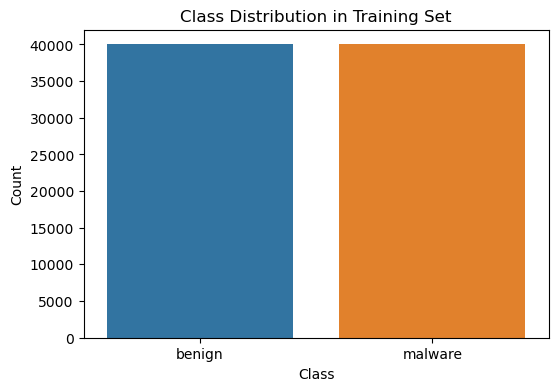

In [21]:

# Correlation analysis
correlation_matrix = X_train.corr()

# Plotting the class distribution in the training set
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


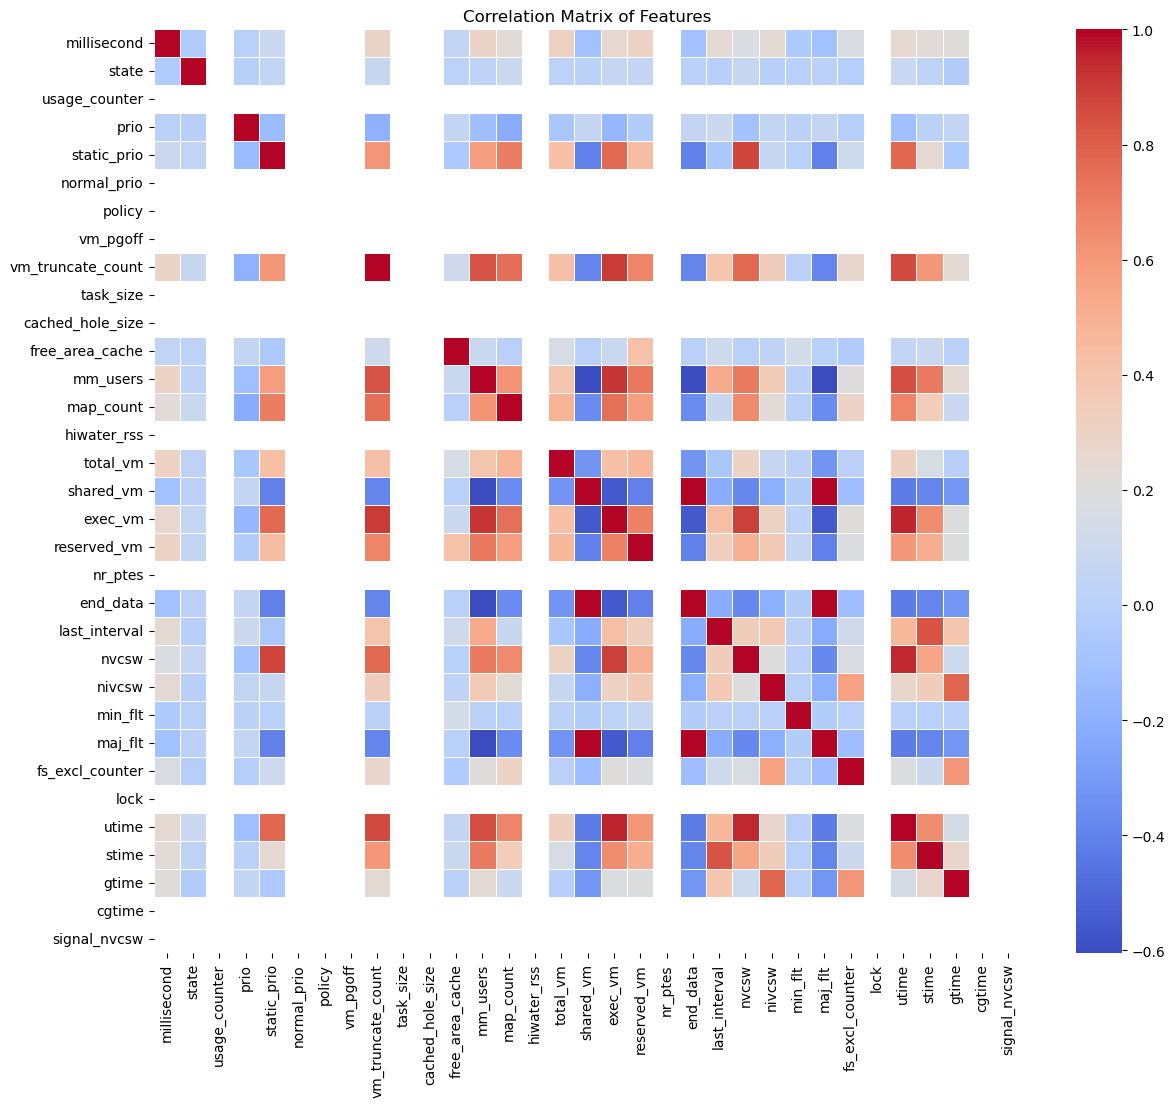

In [22]:

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


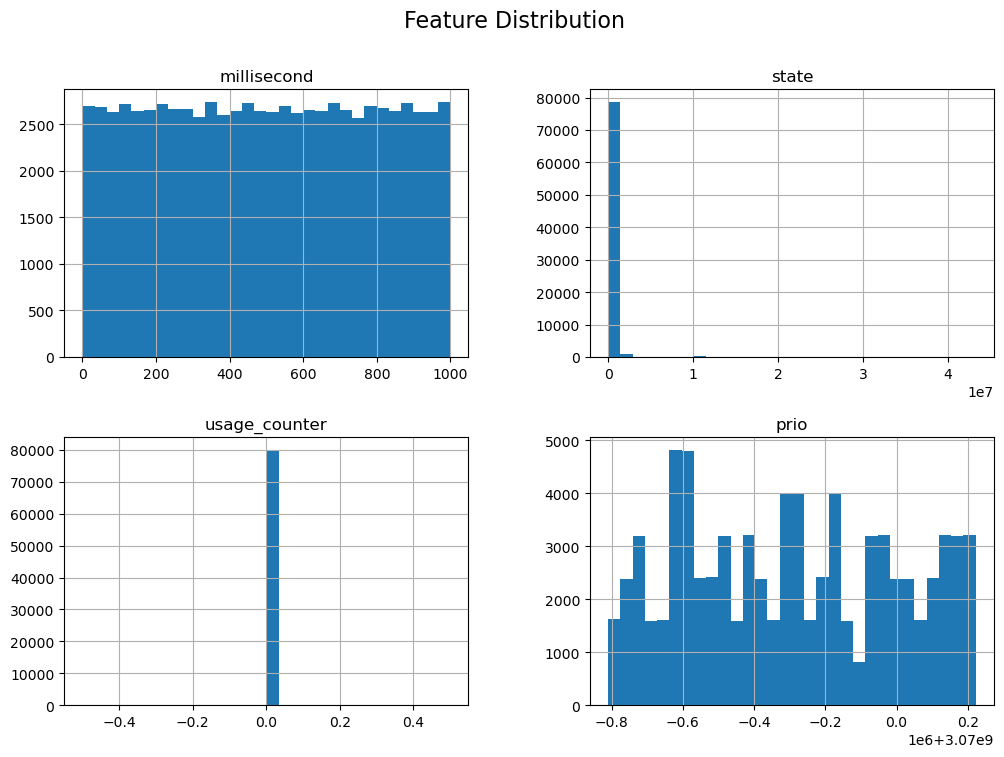

In [23]:

# Plotting the distribution of a few selected features
selected_features = X_train.columns[:4]  # Select the first 4 features for visualization
X_train[selected_features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Feature Distribution', fontsize=16)
plt.show()


C:\Users\offic\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


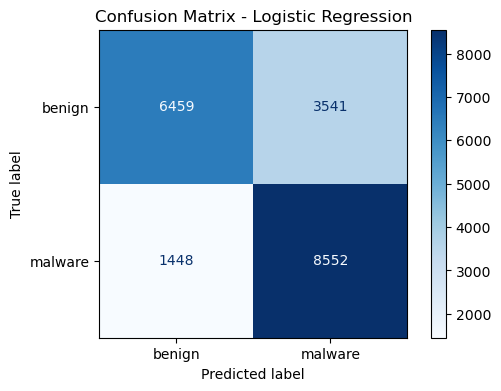

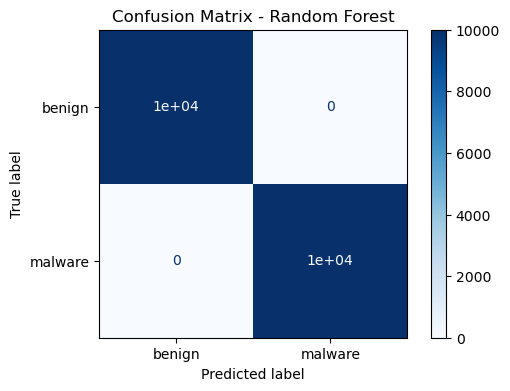

C:\Users\offic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


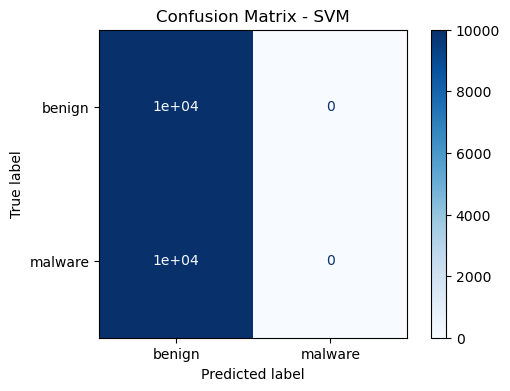

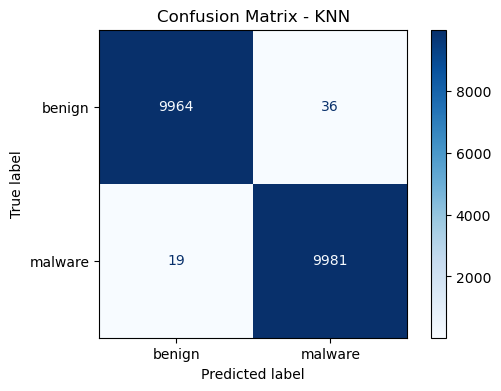

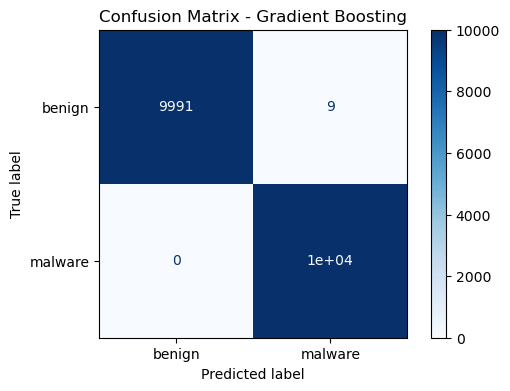

In [24]:

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', random_state=42)
knn = KNeighborsClassifier()
gradient_boosting = GradientBoostingClassifier(random_state=42)

# List of classifiers
classifiers = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "SVM": svm,
    "KNN": knn,
    "Gradient Boosting": gradient_boosting
}

# Dictionary to store performance metrics
metrics = {}

# Train, test, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label="malware")
    recall = recall_score(y_test, y_pred, pos_label="malware")
    f1 = f1_score(y_test, y_pred, pos_label="malware")
    
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot(cmap='Blues', ax=plt.gca())
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [25]:

# Display performance metrics
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                     Accuracy  Precision  Recall  F1 Score
Logistic Regression   0.75055   0.707186  0.8552  0.774182
Random Forest         1.00000   1.000000  1.0000  1.000000
SVM                   0.50000   0.000000  0.0000  0.000000
KNN                   0.99725   0.996406  0.9981  0.997252
Gradient Boosting     0.99955   0.999101  1.0000  0.999550
